In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
from random import sample
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [38]:
im = imageio.imread("Mona_Lisa.jpg")
im.shape

(900, 604, 3)

#### b. Preprocessing the input.

In [4]:
x = sample(list(np.ndindex(im.shape[0],im.shape[1])), int(im.shape[0]*im.shape[1]*0.01))
x = np.array(x)

#### c. Preprocessing the output.

In [5]:
y = []
for p in x:
    y.append(im[p[0],p[1],:])
    
y = np.array(y)

In [6]:
print(x.shape)
print(y.shape)

(5436, 2)
(5436, 3)


#### d. Random Forest

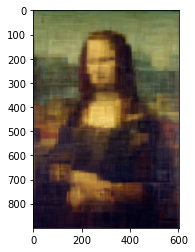

In [13]:
rf = RandomForestRegressor()
rf.fit(x, y)
pred = rf.predict(list(np.ndindex(im.shape[0],im.shape[1]))).reshape(im.shape[0],-1,3)
plt.imshow(pred.astype(int))

#### e. Experimentation
i. One decision tree, varying depth.

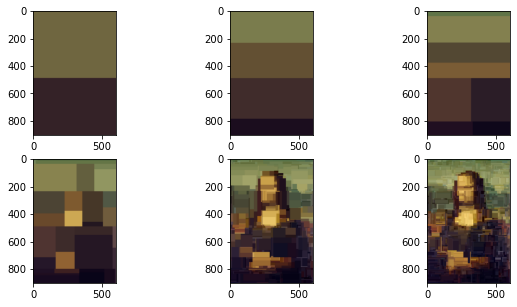

In [8]:
fig, ax = plt.subplots(2,3,figsize=(10,5))
depths = [1,2,3,5,10,15]
for i in range(6):
    rf = RandomForestRegressor(n_estimators=1,max_depth=depths[i])
    rf.fit(x, y)
    pred = rf.predict(list(np.ndindex(im.shape[0],im.shape[1]))).reshape(im.shape[0],-1,3)
    ax[i//3][i%3].imshow(pred.astype(int))

ii. Max depth of 7, varying number of trees.

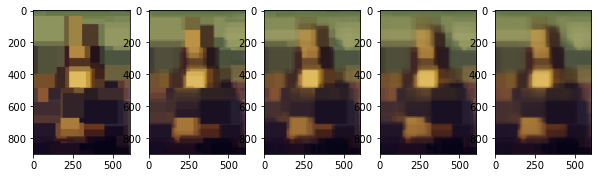

In [14]:
fig, ax = plt.subplots(1,5, figsize=(10,5))
n_estims = [1,3,5,10,100]
for i in range(5):
    rf = RandomForestRegressor(n_estimators=n_estims[i],max_depth=7)
    rf.fit(x, y)
    pred = rf.predict(list(np.ndindex(im.shape[0],im.shape[1]))).reshape(im.shape[0],-1,3)
    ax[i].imshow(pred.astype(int))

iii. KNN as a baseline.

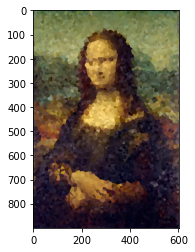

In [12]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(x,y)
pred = knn.predict(list(np.ndindex(im.shape[0],im.shape[1]))).reshape(im.shape[0],-1,3)
plt.imshow(pred.astype(int))

iv. Experiment with different pruning strategies.

In [17]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
cv = RandomizedSearchCV(estimator=rf, param_distributions={"min_samples_split":list(range(2,20,3)), "max_depth":list(range(2,50,5))}, cv=10)
cv.fit(x,y)
cv.best_params_

{'min_samples_split': 5, 'max_depth': 12}

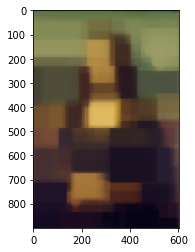

In [18]:
cv.predict(list(np.ndindex(im.shape[0],im.shape[1]))).reshape(im.shape[0],-1,3)
plt.imshow(pred.astype(int))

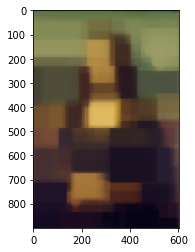

In [39]:
rf = RandomForestRegressor(max_depth=2, n_estimators=200)
rf.fit(x,y)
rf.predict(list(np.ndindex(im.shape[0],im.shape[1]))).reshape(im.shape[0],-1,3)
plt.imshow(pred.astype(int))

#### f. Analysis
i. Decision rule at each split point?

In [40]:
first_estimator = rf.estimators_[0]

In [41]:
from sklearn.tree import export_text
print(export_text(first_estimator))

|--- feature_0 <= 481.50
|   |--- feature_0 <= 228.50
|   |   |--- value: [122.44, 124.92, 78.01]
|   |--- feature_0 >  228.50
|   |   |--- value: [101.95, 83.94, 53.86]
|--- feature_0 >  481.50
|   |--- feature_0 <= 788.50
|   |   |--- value: [64.54, 43.67, 43.68]
|   |--- feature_0 >  788.50
|   |   |--- value: [25.98, 13.26, 30.64]

